## Дипломная работа по курсу python

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

#### 1. Загрузите файл HR.csv в pandas dataframe

In [3]:
data_hr = pd.read_csv('D:/DATA_SCIENCE/dataset/diplom_python/HR.csv')
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [5]:
# Расчёт моды
data_hr_mode = data_hr.round().mode()
data_hr_mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.0,1.0,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Расчёт среднего, медианы, мин/макс, среднего отклонения

In [6]:
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
####    Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [16]:
data_hr.corr().style.background_gradient('coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

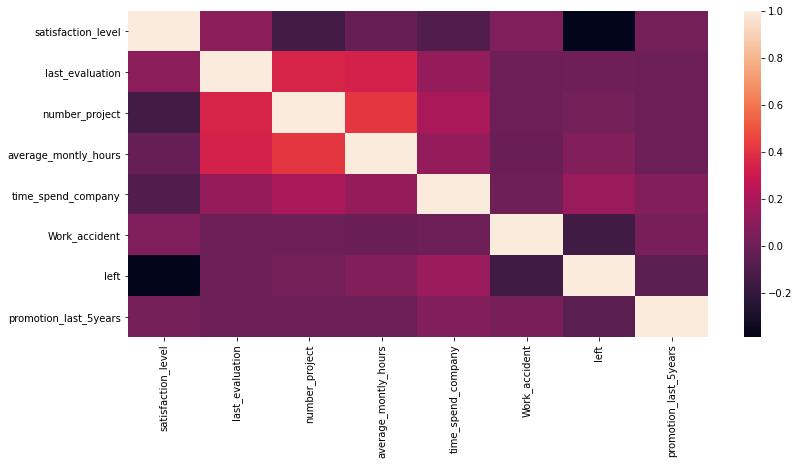

In [8]:
sns.heatmap(data_hr.corr())

#### Вывод:
* 2 самые скоррелированные переменные: average_monthly_hours - Среднее количество часов на рабочем месте в месяц и number_projects - Количество проектов, выполненных за время работы (прямая связь)
* 2 наимение скоррелированные переменные: promotion_last_5years - повышался ли сотрудник за последние пять лет и average_monthly_hours - Среднее количество часов на рабочем месте в месяц (обратная связь)

#### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [25]:
data_hr_work = data_hr[data_hr.left == False]
data_hr_work.department.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

#### 5. Показать распределение сотрудников по зарплатам.

In [71]:
df = data_hr.salary.value_counts().reset_index()
df.rename(columns={'index':'Уровень зарплаты', 'salary':'Количество сотрудников'}, inplace=True)
df

,Уровень зарплаты,Количество сотрудников
0,low,7316
1,medium,6446
2,high,1237


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Уровень зарплаты'>

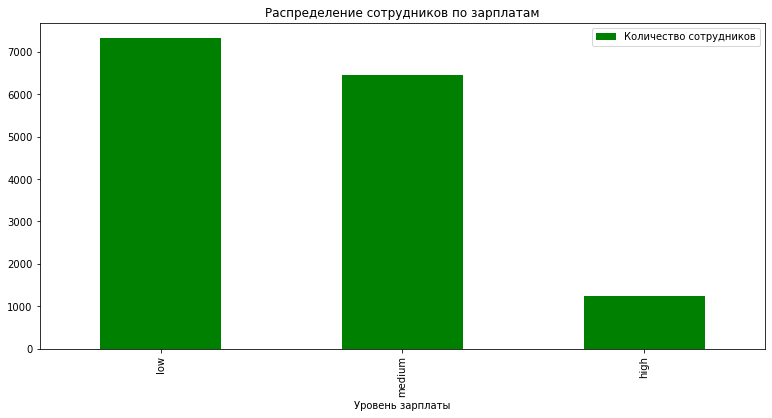

In [72]:
df.plot.bar( x = 'Уровень зарплаты',  y ='Количество сотрудников',
                   title='Распределение сотрудников по зарплатам', color = 'g')

#### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [8]:
df = pd.DataFrame(data_hr.groupby('department')['salary'].value_counts())
df.rename(columns={'salary':'Количество сотрудников'}, inplace=True)
df = pd.pivot_table(df.reset_index(), index = 'salary', columns = 'department', values = 'Количество сотрудников')
df.reindex(['low', 'medium', 'high'])

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147
high,83,51,74,45,225,80,68,269,141,201


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='salary'>

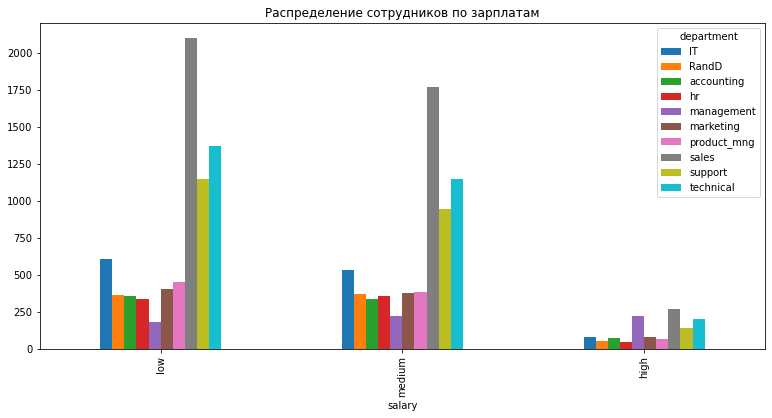

In [10]:
df.reindex(['low', 'medium', 'high']).plot.bar(title='Распределение сотрудников по зарплатам')

#### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом


In [4]:
# H0 - Среднее время на работе сотрудников с высоким окладом и сотрудников с низким окладом не отличаются или отличаются незначительно
# Ha - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
# Получаем две независимые выборки
data_hours_high_salary = data_hr[['average_montly_hours', 'salary']][(data_hr['salary'] == 'high')]
data_hours_low_salary = data_hr[['average_montly_hours', 'salary']][(data_hr['salary'] == 'low')]

<AxesSubplot:title={'center':'Распределение среднего количества часов на рабочем месте в месяц сотрудников с высоким окладом'}, ylabel='Frequency'>

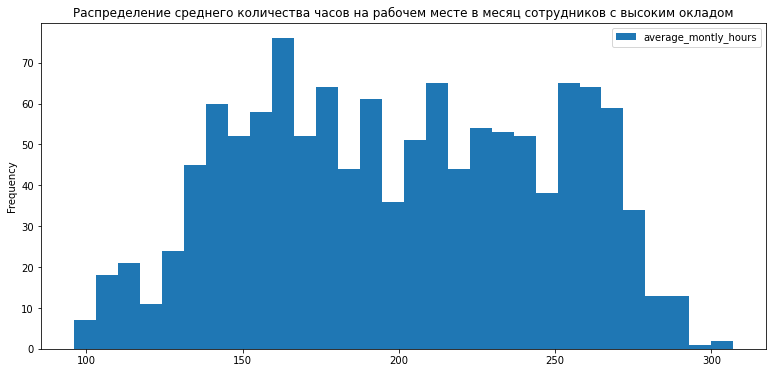

In [55]:
# Проверяем распределение выборок
data_hours_high_salary.plot.hist(bins = 30, title='Распределение среднего количества часов на рабочем месте в месяц сотрудников с высоким окладом')

<AxesSubplot:title={'center':'Распределение среднего количества часов на рабочем месте в месяц сотрудников с низким окладом'}, ylabel='Frequency'>

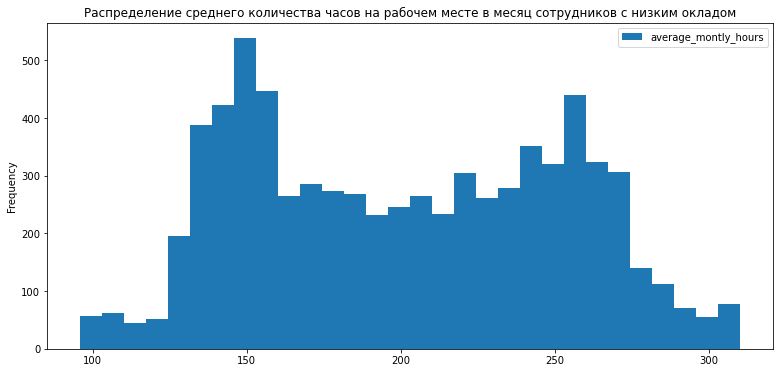

In [56]:
data_hours_low_salary.plot.hist(bins = 30, title='Распределение среднего количества часов на рабочем месте в месяц сотрудников с низким окладом')

In [ ]:
# Из визуализации не видно, что выборки имеют нормальное распределение
# Проверяем нормальность по критерию Андерсона-Дарлинга
# H0 - выборки имеют нормальное распределение

In [47]:
np.random.seed(41)
stats.anderson(data_hours_high_salary['average_montly_hours'])

AndersonResult(statistic=10.628515275333484, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [48]:
np.random.seed(41)
stats.anderson(data_hours_low_salary['average_montly_hours'])

AndersonResult(statistic=106.07839458442504, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
# Полученные рез-ты критериев 10,63 и 106,08 превышают критические показатели для всех уровней значимости.
# Гипотеза, что выборки имеют нормальное распределение, отклоняется.

In [ ]:
# Выборки независимые, с количественными данными, не имеют нормального распределения
# Применим для сравнения U-тест Манна-Уитни

In [57]:
from scipy.stats import mannwhitneyu
A=data_hours_high_salary['average_montly_hours']
B=data_hours_low_salary['average_montly_hours']
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)

##### Вывод:
* p-value = 0,41 > уровня значимости = 0,05.
* Нулевую гипотезу об отсутствии различий в среднем времени, проведённом на работе работниками с высокой и низкой зарплатой, отклонить не можем.

#### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

* ● Доля сотрудников с повышением за последние 5 лет
* ● Средняя степень удовлетворенности
* ● Среднее количество проектов


In [58]:
data_hr_left = data_hr[['satisfaction_level', 'promotion_last_5years','number_project', 'left']][(data_hr['left'] == True)]
data_hr_left.head()

,satisfaction_level,promotion_last_5years,number_project,left
0,0.38,0,2,1
1,0.80,0,5,1
2,0.11,0,7,1
3,0.72,0,5,1
4,0.37,0,2,1


In [59]:
data_hr_work = data_hr[['satisfaction_level', 'promotion_last_5years','number_project', 'left']][(data_hr['left'] == False)]
data_hr_work.head()

,satisfaction_level,promotion_last_5years,number_project,left
2000,0.58,0,4,0
2001,0.82,0,2,0
2002,0.45,0,5,0
2003,0.78,0,5,0
2004,0.49,0,3,0


In [123]:
def point_8(data):
    A = 100 * len(data[data.promotion_last_5years != 0])/len(data.promotion_last_5years)
    B = data.satisfaction_level.mean()
    C = round(data.number_project.mean())
    print(f'Доля сотрудников с повышением за последние 5 лет - {A:.2f}%') 
    print(f'Средняя степень удовлетворенности - {B:.2f}')
    print(f'Среднее количество проектов - {C}') 
       

In [125]:
print('Сотрудники уволенные на данный момент:')
point_8(data_hr_left)
print()
print('Сотрудники работающие на данный момент:')
point_8(data_hr_work)

Сотрудники уволенные на данный момент:
Доля сотрудников с повышением за последние 5 лет - 0.53%
Средняя степень удовлетворенности - 0.44
Среднее количество проектов - 4

Сотрудники работающие на данный момент:
Доля сотрудников с повышением за последние 5 лет - 2.63%
Средняя степень удовлетворенности - 0.67
Среднее количество проектов - 4


#### 9. Разделить данные на тестовую и обучающую выборки.
####    Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
####    Оценить качество модели на тестовой выборке

In [130]:
# загружаем данные в датафрейм
data_model = data_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
data_model.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [134]:
data_target = np.asarray(list(data_hr['left']))
data_target

array([1, 1, 1, ..., 1, 1, 1])

In [135]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_model, data_target, test_size=0.30)

In [136]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [137]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [138]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(20)

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,1,0


In [169]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
print(f'Точность модели - {accuracy_score(y_test, lda.predict(X_test)):.2%}')

Точность модели - 76.13%


In [188]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.49211289e+00,  7.26591860e-01, -2.42207768e-01,
         3.80263675e-03,  2.26958944e-01, -1.04834994e+00,
        -1.15185691e+00]])

#### Вывод:
*    Точность модели - 76,13 %
*    Наиболее сильный фактор (обратная зависимость (-4,49)), влияющий на увольнение, является удовлетворённость работой.